In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [2]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [3]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


Node                                  position bandwidth  mobility  \
0     0  (56.142428448413064, 41.901555876576104)         9  0.674409   
1     1   (20.325324179461724, 38.52494909571688)         5  0.753732   
2     2    (44.47704078715237, 5.610210173478569)         4  0.841323   
3     3  (11.098580073486907, 19.118693149290998)         8  0.384772   
4     4   (33.50651520071941, 15.013088841856481)         3  0.074453   
5     5    (26.009992485463297, 4.90108598703004)         2  0.634765   
6     6    (88.8696798393243, 15.003367051254646)        10  0.470354   
7     7    (28.29582565118257, 94.50554576845943)         3  0.495845   
8     8   (1.7271703090304014, 91.79882346816439)         7  0.488389   
9     9   (55.203076355796874, 58.63016752628477)         7  0.851927   

  transmission_power packet_loss battery_capacity  
0           6.837878     0.04349        99.863521  
1          18.036763    0.668563        79.222647  
2            9.79311    0.631271        93.603145  
3          18.878227    0.443472         49.85772  
4           8.213515    0.656086        36.626272  
5            7.83269    0.876087        92.199075  
6           6.787615    0.597604        41.865904  
7          13.127395    0.967482        75.846717  
8           8.312407    0.271371        82.810547  
9          11.677746    0.081706        46.072572

In [4]:
nodes_df.to_csv('improved.csv')

In [5]:
df = pd.read_csv('basic.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

Node                                 position  bandwidth  mobility  \
0     0  (81.94919435002753, 22.002771515434205)          3  0.267120   
1     1   (98.28951369247514, 89.32412910341392)          6  0.155198   
2     2  (79.13863747090667, 15.007246783018102)          6  0.412229   
3     3   (42.79819085191681, 82.01060985301652)          1  0.192452   
4     4  (90.08373579376975, 39.213936121299945)          4  0.952184   
5     5  (42.832020059420515, 97.31146570421286)          2  0.647631   
6     6    (85.4926830236732, 70.30286166191841)         10  0.157379   
7     7   (22.89780120074002, 87.87124572430301)          5  0.807443   
8     8   (78.63838342191761, 68.05259871051729)          1  0.656505   
9     9  (11.605328480347376, 36.39324596344539)          4  0.143680   

   transmission_power  packet_loss  battery_capacity  
0           14.543173     0.386004         21.836698  
1           11.103399     0.120545         31.915334  
2           18.631823     0.246799         15.435587  
3           14.139456     0.688853         35.549713  
4           15.083241     0.318087         16.448343  
5            7.212308     0.695513         54.785212  
6           14.427517     0.860899         28.843045  
7            7.207781     0.346060         46.525246  
8           11.835669     0.607630         24.560361  
9            8.499666     0.731581         88.666060

# Bellman Ford Algo

In [8]:
def bellman_ford_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    # Step 1: Initialize distances and predecessor nodes
    dist = {node: float("inf") for node in nodes_df["Node"]}
    dist[source] = 0
    prev = {node: None for node in nodes_df["Node"]}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_df) - 1):
        for edge in G.edges():
            u, v = edge
            bandwidth = min(nodes_df.loc[u]["bandwidth"], nodes_df.loc[v]["bandwidth"])
            mobility = max(nodes_df.loc[u]["mobility"], nodes_df.loc[v]["mobility"])
            transmission_power = min(
                nodes_df.loc[u]["transmission_power"], nodes_df.loc[v]["transmission_power"]
            )
            battery_capacity = min(
                nodes_df.loc[u]["battery_capacity"], nodes_df.loc[v]["battery_capacity"]
            )
            packet_loss = max(nodes_df.loc[u]["packet_loss"], nodes_df.loc[v]["packet_loss"])

            if (
                dist[u]
                + (bandwidth - mobility + transmission_power + battery_capacity - packet_loss)
                < dist[v]
            ):
                dist[v] = dist[u] + (
                    bandwidth - mobility + transmission_power + battery_capacity - packet_loss
                )
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for edge in G.edges():
        u, v = edge
        bandwidth = min(nodes_df.loc[u]["bandwidth"], nodes_df.loc[v]["bandwidth"])
        mobility = max(nodes_df.loc[u]["mobility"], nodes_df.loc[v]["mobility"])
        transmission_power = min(
            nodes_df.loc[u]["transmission_power"], nodes_df.loc[v]["transmission_power"]
        )
        battery_capacity = min(
            nodes_df.loc[u]["battery_capacity"], nodes_df.loc[v]["battery_capacity"]
        )
        packet_loss = max(nodes_df.loc[u]["packet_loss"], nodes_df.loc[v]["packet_loss"])

        if (
            dist[u]
            + (bandwidth - mobility + transmission_power + battery_capacity - packet_loss)
            < dist[v]
        ):
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path


In [9]:
source = 2
destination = 9
path = bellman_ford_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9]


In [10]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


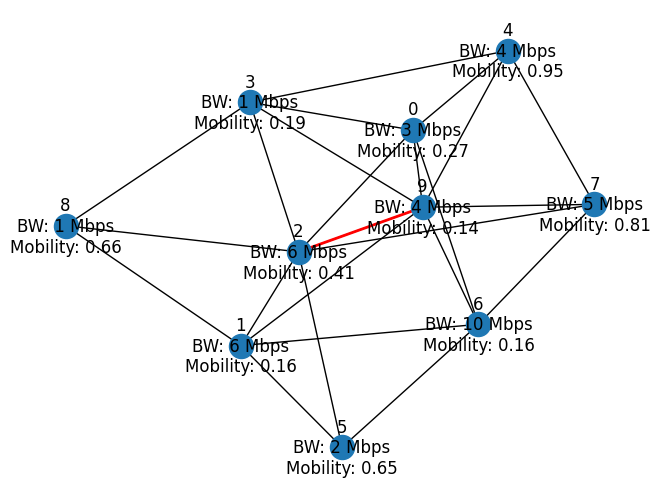

In [11]:
draw_network_graph(G, path, df)

In [12]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df1 = pd.DataFrame(data_list)
    return df1


In [13]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 26.791443595891675


node_a  node_b  bandwidth  mobility  transmission_power  battery_capacity  \
0       2       9          4  0.412229            8.499666         15.435587   

   packet_loss     health  
0     0.731581  26.791444

# Dijkstra Algo

In [14]:
def dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    visited = set()
    queue = [(source, [source])]

    shortest_path = None
    best_score = float("-inf")

    while queue:
        current, path = queue.pop(0)
        visited.add(current)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                score = (
                    nodes_df.loc[neighbor]["bandwidth"]
                    - nodes_df.loc[neighbor]["mobility"]
                    + nodes_df.loc[neighbor]["transmission_power"]
                    + nodes_df.loc[neighbor]["battery_capacity"]
                    - nodes_df.loc[neighbor]["packet_loss"]
                )
                if score > best_score:
                    best_score = score
                    next_hop = neighbor
                if neighbor == destination:
                    shortest_path = path + [neighbor]
                    return shortest_path
        if best_score > float("-inf"):
            visited.add(next_hop)
            queue.append((next_hop, path + [next_hop]))
            best_score = float("-inf")

    return shortest_path


In [15]:
source = 2
destination = 9
path = dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9]


In [16]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


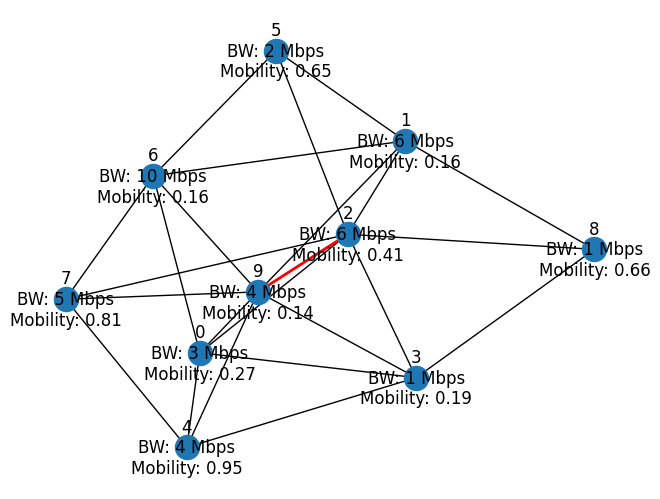

In [18]:
df2 = draw_network_graph(G, path, df)
df2 

In [19]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df2 = pd.DataFrame(data_list)
    return df2


In [21]:
df2 = calculate_avg_health(G, path, df)
df2 

avg health of transfer 26.791443595891675


node_a  node_b  bandwidth  mobility  transmission_power  battery_capacity  \
0       2       9          4  0.412229            8.499666         15.435587   

   packet_loss     health  
0     0.731581  26.791444

# Genetic Algo

In [22]:
import random
import numpy as np
import networkx as nx


def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            node_props = nodes_df.loc[start_node]
            fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
                'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        node_props = nodes_df.loc[individual[-1]]
        fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
            'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        if len(parent1) > 1 and len(parent2) > 1:
            crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            return child1, child2
        else:
            return parent1, parent2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [43]:
source = 2
destination = 9
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9, 1, 5, 1, 9, 4, 9, 8, 1, 9]


In [44]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


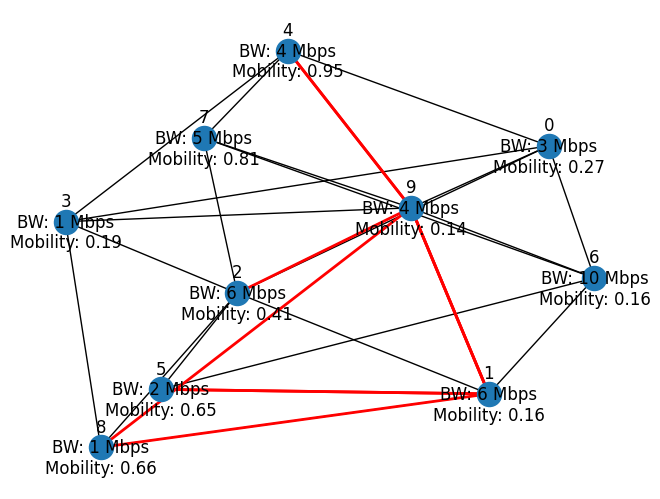

In [45]:
df2 = draw_network_graph(G, path, df)
df2 

In [46]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    # Initializing all variables to 0
    bandwidth = 0
    mobility = 0
    transmission_power = 0
    battery_capacity = 0
    packet_loss = 0
    health = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    # Converting the list of dictionaries into a DataFrame
    df3 = pd.DataFrame(data_list)
    return df3


In [47]:
df3 = calculate_avg_health(G, path, df)
df3 

avg health of transfer 36.31924577068792


node_a  node_b  bandwidth  mobility  transmission_power  battery_capacity  \
0       2       9          4  0.412229            8.499666         15.435587   
1       9       1          4  0.155198            8.499666         31.915334   
2       1       5          2  0.647631            7.212308         31.915334   
3       5       1          2  0.647631            7.212308         31.915334   
4       1       9          4  0.155198            8.499666         31.915334   
5       9       4          4  0.952184            8.499666         16.448343   
6       4       9          4  0.952184            8.499666         16.448343   
7       8       1          1  0.656505           11.103399         24.560361   
8       1       9          4  0.155198            8.499666         31.915334   

   packet_loss     health  
0     0.731581  26.791444  
1     0.731581  43.528220  
2     0.695513  39.784497  
3     0.695513  39.784497  
4     0.731581  43.528220  
5     0.731581  27.264244  
6     0.731581  27.264244  
7     0.607630  35.399626  
8     0.731581  43.528220